# cv2学习笔记3
## 滤波器
### 2D滤波器cv2.filter2D
<br/>
OpenCV提供的一个通用的2D滤波函数为cv2.filter2D()，滤波函数的使用需要一个核模板，对图像的滤波操作过程为：将和模板放在图像的一个像素A上，求与之对应的图像上的每个像素点的和，核不同，得到的结果不同，而滤波的使用核心也是对于这个核模板的使用。

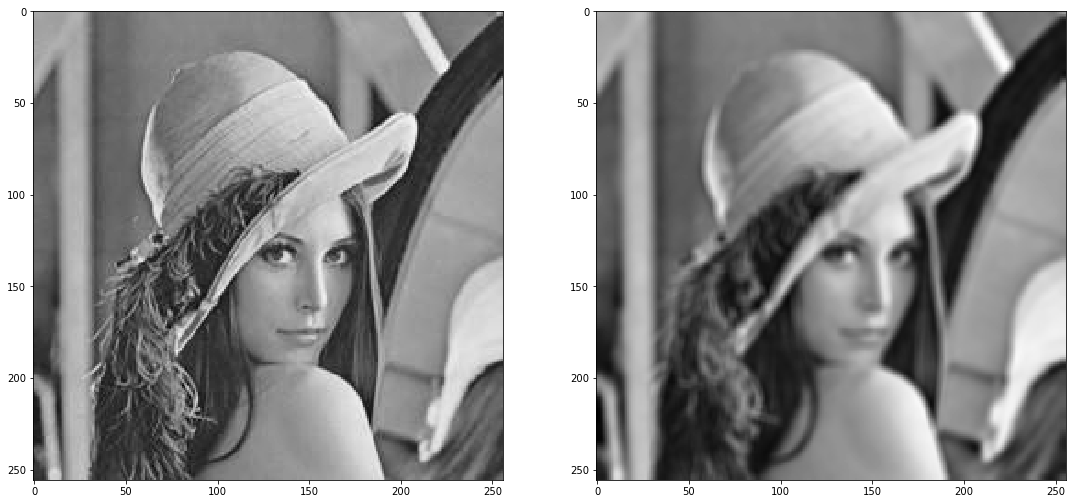

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('C:/Users/situ.st.1/Pictures/lena.jpg',0) 
img1 = np.float32(img) #转化数值类型
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img1,-1,kernel)
plt.figure(figsize=(18.5,10.5)) 
plt.subplot(121),plt.imshow(img,"gray")
plt.subplot(122),plt.imshow(dst,"gray")
plt.show()
#cv2.waitKey()
#cv2.destroyAllWindows()

频域分析将图像分成从低频到高频的不同部分。低频对应图像强度变化小的区域，而高频是图像强度变化非常大的区域。目前已存在若干转换方法，如傅立叶变换或余弦变换，可以用来清晰的显示图像的频率内容。注意，由于图像是一个二维实体，所以其由水平频率（水平方向的变化）和竖直频率（竖直方向的变化）共同组成。  
<br/> 在频率分析领域的框架中，滤波器是一个用来增强图像中某个波段或频率并阻塞（或降低）其他频率波段的操作。低通滤波器是消除图像中高频部分，但保留低频部分。高通滤波器消除低频部分,突出高频部分。
<br/> 
### 高通滤波器
- 定义：检测图像的某个区域，然后根据像素与周围像素的亮度差值来提升(boost)该像素的亮度的滤波器，用于找图像边界
- 核是指一组权重的集合，它会应用在源图像的一个区域，并由此生成目标图像的一个像素。
    
    
    比如，大小为7的核意味着每49（7 x 7）个源图像的像素会产生目标图像的一个像素。可把核看作一块覆盖在源图像上可移动的毛玻璃片，玻璃片覆盖区域的光线会按某种方式进行扩散混合后透过去。

    在计算完中央像素与周围邻近像素的亮度差值之和以后，如果亮度变化很大，中央像素的亮度会增加（反之则不会）。换句话说，如果一个像素比它周围的像素更突出，就会提升它的亮度。这在边缘检测上尤其有效，它会采用一种称为高频提升滤波器(high boost filter)的高通滤波器。

- 二维卷积运算，图像的滤波可以看成是滤波模板与原始图像对应部分的的卷积运算。<http://blog.csdn.net/xiaoxin_ling/article/details/3587987>

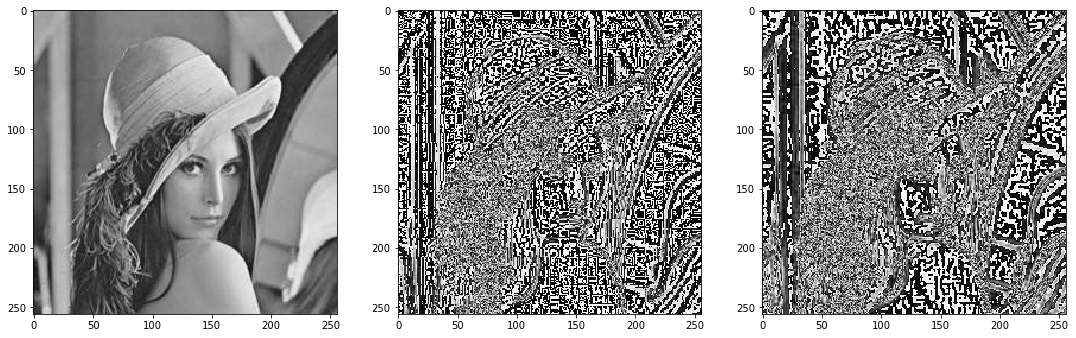

In [11]:
import cv2
import numpy as np
from scipy import ndimage
#定义核元素
kernal_3x3 = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]])
kernal_5x5 = np.array([[-1, -1, -1, -1, -1],
                       [-1, 1, 2, 1, -1],
                       [-1, 2, 4, 2, -1],
                       [-1, 1, 2, 1, -1],
                       [-1, -1, -1, -1,-1]])
img = cv2.imread('C:/Users/situ.st.1/Pictures/lena.jpg',0) 
 # 注：使用ndimage.convolve()时，滤波核的维度应与原始图像的维度相同，故此采用灰度图
k3 = ndimage.convolve(img, kernal_3x3) #卷积
k5 = ndimage.convolve(img, kernal_5x5)
plt.figure(figsize=(18.5,10.5)) 
plt.subplot(131),plt.imshow(img,"gray")
plt.subplot(132),plt.imshow(k3,"gray")
plt.subplot(133),plt.imshow(k5,"gray")
plt.show()
#cv2.imshow("image", img)
#cv2.imshow("3x3", k3)
#cv2.imshow("5x5", k5)
#cv2.waitKey()
#cv2.destroyAllWindows()

- 还有一种方法可实现高通滤波器：通过对图像应用低通滤波器之后，与原始图像计算差值。

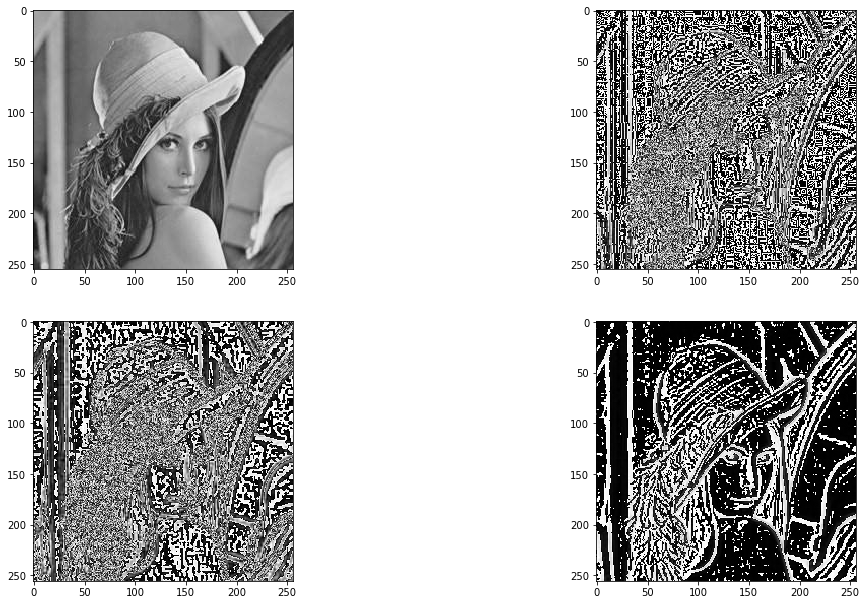

In [13]:
blurred = cv2.GaussianBlur(img, (11, 11), 0)
g_hpf = img - blurred
plt.figure(figsize=(18.5,10.5)) 
plt.subplot(221),plt.imshow(img,"gray")
plt.subplot(222),plt.imshow(k3,"gray")
plt.subplot(223),plt.imshow(k5,"gray")
plt.subplot(224),plt.imshow(g_hpf,"gray")
plt.show()
#cv2.imshow("image", img)
#cv2.imshow("3x3", k3)
#cv2.imshow("5x5", k5)
#cv2.imshow("g_hpf", g_hpf)
#cv2.waitKey()
#cv2.destroyAllWindows()

### 低通滤波器
- 低通滤波器是线性滤波器，它的目标是降低图像的变化率。如将每个像素替换为该像素周围像素的均值，这样就可以平滑并替代那些强度变化明显的区域，从而实现对图像噪声的消除，增强图像的效果。

#### 均值滤波cv2.blur cv2.boxFilter
-cv2.blur cv2.boxFilter是专门的平均滤波模板供使用–归一化卷积模板，所有的滤波模板都是使卷积框覆盖区域所有像素点与模板相乘后得到的值作为中心像素的值。
比如一个3*3的模板其实就可以如下表示*： 
$\frac{1}{9} \left[ \begin{matrix} 1 & 1 & 1\\ 1 & 1 & 1\\1 & 1 & 1\end{matrix}\right]\ $

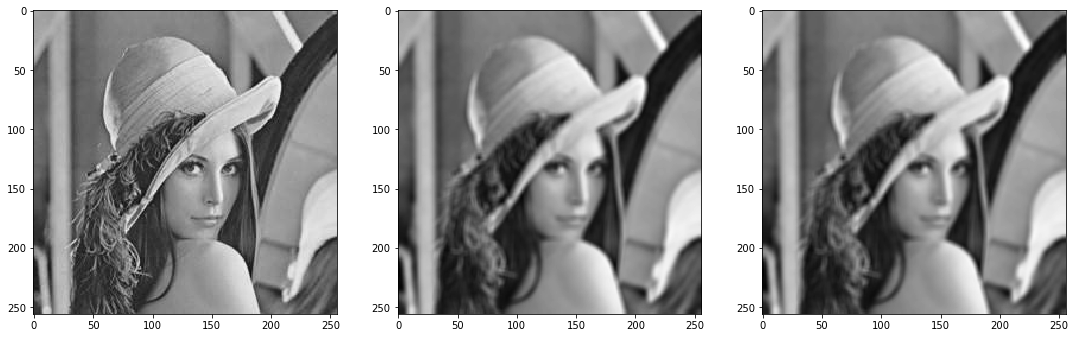

In [14]:
import cv2  
img = cv2.imread("C:/Users/situ.st.1/Pictures/lena.jpg", 0)  
result = cv2.blur(img, (5,5))    
#cv2.imshow("Origin", img);
#cv2.imshow("Blur", result);    
result1 = cv2.boxFilter(img, -1, (5, 5)) #与blur函数完全相同
plt.figure(figsize=(18.5,10.5)) 
plt.subplot(131),plt.imshow(img,"gray")
plt.subplot(132),plt.imshow(result,"gray")
plt.subplot(133),plt.imshow(result1,"gray")
plt.show()
#cv2.imshow("boxfilter",result1)
#cv2.waitKey(0)  
#cv2.destroyAllWindows()

## 高斯模糊cv2.GaussianBlur
- 低通滤波与高斯滤波的不同之处在于：低通滤波中，滤波器中每个像素的权重是相同的，即滤波器是线性的。而高斯滤波器中像素的权重与其距中心像素的距离成比例。
- 现在把卷积模板中的值换一下，不是全1了，换成一组符合高斯分布的数值放在模板里面，比如这时中间的数值最大，往两边走越来越小，构造一个小的高斯包。对于高斯模板，我们需要制定的是高斯核的高和宽（奇数），沿x与y方向的标准差(如果只给x，y=x，如果都给0，那么函数会自己计算)。
- 高斯核可以有效的出去图像的高斯噪声。

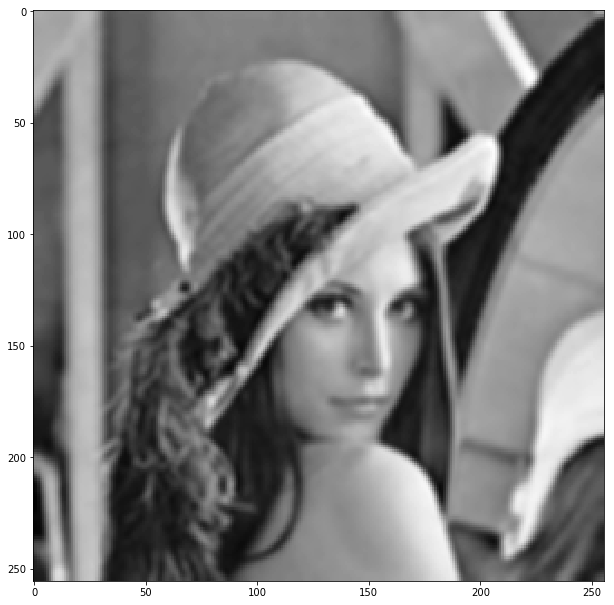

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("C:/Users/situ.st.1/Pictures/lena.jpg", 0)  
gaussianResult = cv2.GaussianBlur(img,(5,5),1.5)  
plt.figure(figsize=(18.5,10.5)) 
plt.imshow(gaussianResult,"gray")
plt.show()
#cv2.imshow("gauss",gaussianResult);
#cv2.waitKey(0)  
#cv2.destroyAllWindows()  

 
## 中值模糊cv2.medianBlur
- 中值模糊是非线性过滤器，中值滤波模板就是用卷积框中像素的中值代替中心值，达到去噪声的目的。
    
    前面的滤波器都是用计算得到的一个新值来取代中心像素的值，而中值滤波是用中心像素周围（也可以使他本身）的值来取代。如果在某个像素周围有白色或黑色的像素，这些白色或黑色的像素不会选择作为中值（最大或最小值不用），而是被替换为邻域值。由于中值滤波不会处理最大和最小值，所以就不会受到噪声的影响。相反，如果直接采用blur进行均值滤波，则不会区分这些噪声点，滤波后的图像会受到噪声的影响。
- medianblur函数返回处理结果，第一个参数是待处理图像，第二个参数是孔径的尺寸，一个大于1的奇数。
- 这个模板一般用于去除椒盐噪声。

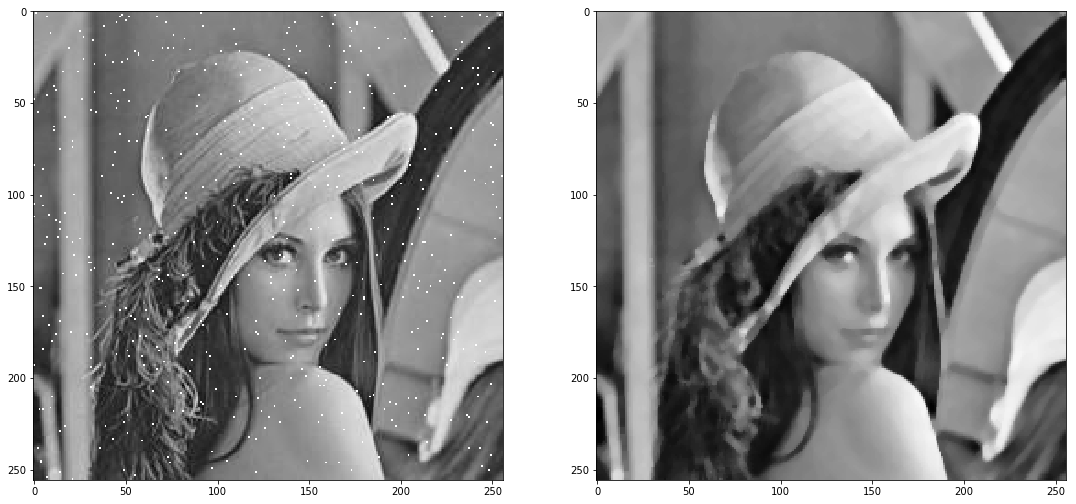

In [5]:
import cv2  
import numpy as np    
#生成椒盐现象函数  
def salt(img, n):    
    for k in range(n):    
        i = int(np.random.random() * img.shape[1]);    
        j = int(np.random.random() * img.shape[0]);    
        if img.ndim == 2:     
            img[j,i] = 255    
        elif img.ndim == 3:     
            img[j,i,0]= 255    
            img[j,i,1]= 255    
            img[j,i,2]= 255    
    return img   
img = cv2.imread("C:/Users/situ.st.1/Pictures/lena.jpg", 0)  
result = salt(img, 500)  
median = cv2.medianBlur(result, 5)  
plt.figure(figsize=(18.5,10.5)) 
plt.subplot(121),plt.imshow(result,"gray")
plt.subplot(122),plt.imshow(median,"gray")
plt.show()
#cv2.imshow("Salt", result)  
#cv2.imshow("Median", median)  
#cv2.waitKey(0)  
